In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_excel('./in_data/COVID-19-geographic-disbtribution-worldwide-2020-04-10.xlsx')

In [3]:
df['days from 2020/01/01'] = (pd.to_datetime(df['dateRep']) - pd.to_datetime('2019-12-31')).dt.days

In [4]:
df['popData2018'].fillna(df['popData2018'].mean())

0       37172386.0
1       37172386.0
2       37172386.0
3       37172386.0
4       37172386.0
5       37172386.0
6       37172386.0
7       37172386.0
8       37172386.0
9       37172386.0
10      37172386.0
11      37172386.0
12      37172386.0
13      37172386.0
14      37172386.0
15      37172386.0
16      37172386.0
17      37172386.0
18      37172386.0
19      37172386.0
20      37172386.0
21      37172386.0
22      37172386.0
23      37172386.0
24      37172386.0
25      37172386.0
26      37172386.0
27      37172386.0
28      37172386.0
29      37172386.0
           ...    
9892    17351822.0
9893    17351822.0
9894    17351822.0
9895    17351822.0
9896    17351822.0
9897    17351822.0
9898    17351822.0
9899    17351822.0
9900    17351822.0
9901    14439018.0
9902    14439018.0
9903    14439018.0
9904    14439018.0
9905    14439018.0
9906    14439018.0
9907    14439018.0
9908    14439018.0
9909    14439018.0
9910    14439018.0
9911    14439018.0
9912    14439018.0
9913    1443

In [5]:
df = df.sort_values('days from 2020/01/01')

In [6]:
df['cases_total'] = 0
df['deaths_total'] = 0
for i in df['countriesAndTerritories'].unique():
    df.loc[df['countriesAndTerritories'] == i, 'cases_total'] = df[df['countriesAndTerritories'] == i]['cases'].cumsum()
    df.loc[df['countriesAndTerritories'] == i, 'deaths_total'] = df[df['countriesAndTerritories'] == i]['deaths'].cumsum()   

In [7]:
df['deaths_rate'] = df['deaths_total'] / df['popData2018']

In [8]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,days from 2020/01/01,cases_total,deaths_total,deaths_rate
1022,2019-12-31,31,12,2019,0,0,Belarus,BY,BLR,9.485386e+06,0,0,0,0.000000e+00
9153,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,6.942852e+07,0,0,0,0.000000e+00
1124,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,1.142207e+07,0,0,0,0.000000e+00
3530,2019-12-31,31,12,2019,0,0,Georgia,GE,GEO,3.731000e+06,0,0,0,0.000000e+00
6170,2019-12-31,31,12,2019,0,0,Monaco,MC,MCO,3.868200e+04,0,0,0,0.000000e+00
4677,2019-12-31,31,12,2019,0,0,Ireland,IE,IRL,4.853506e+06,0,0,0,0.000000e+00
4179,2019-12-31,31,12,2019,0,0,Iceland,IS,ISL,3.535740e+05,0,0,0,0.000000e+00
4477,2019-12-31,31,12,2019,0,0,Iran,IR,IRN,8.180027e+07,0,0,0,0.000000e+00
3632,2019-12-31,31,12,2019,0,0,Germany,DE,DEU,8.292792e+07,0,0,0,0.000000e+00
7424,2019-12-31,31,12,2019,0,0,Philippines,PH,PHL,1.066519e+08,0,0,0,0.000000e+00


In [29]:
px.scatter(df, x="cases_total", y="deaths_total", animation_frame="days from 2020/01/01",
           animation_group="countriesAndTerritories", color="countriesAndTerritories", hover_name="countriesAndTerritories", 
#            size_max=45, range_x=[100,100000], range_y=[25,90]
          ) 

In [2]:
x = np.arange(0, 100)
y = np.random.randn(100)

In [3]:
y2 = np.random.randn(100)

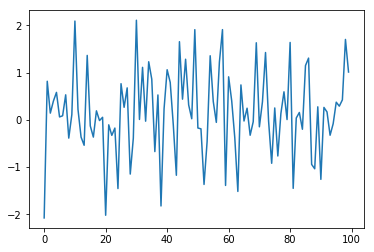

In [4]:
plt.plot(x, y)

In [6]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers+lines',
    name="適当",
    marker=dict(color='Blue', size=20, opacity=0.5),
    line=dict(dash='dot')
    )       # this sets its legend entry
)

fig.add_trace(go.Scatter(
    x=x,
    y=y2,
    mode='markers',
    name="適当2")       # this sets its legend entry
)
fig.update_layout(
#     template='plotly_white',
    title="タイトルです",
    xaxis_title="xです",
    yaxis_title="yです",
    font=dict(
#         family="Meiryo",
        size=18,
        color="black")
)
fig.show()

In [7]:
!jupyter nbconvert --template=nbextensions --to=html Plotly_Graph.ipynb

Traceback (most recent call last):
  File "/home/nbuser/anaconda3_501/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/home/nbuser/anaconda3_501/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/nbuser/anaconda3_501/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nbuser/anaconda3_501/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "/home/nbuser/anaconda3_501/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 500, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "/home/nbuser/anaconda3_501/lib/python3.6/site-packages/nbconvert/exporters/templateexporter.py", line 263, in __init__
    super(TemplateExporter, self).__init__(config=config, **kw)
  File "/home/nbuser/anaconda3_501

In [35]:
#アノテーションを学習
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 3, 2, 4, 3, 4, 6, 5]
))

fig.add_trace(go.Bar(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 4, 5, 1, 2, 2, 3, 4, 2]
))

# Add shapes
# Add shapes
fig.add_shape(
        # Line reference to the axes
            type="line",
            xref="x", #Scaleをxの値にするため必要。yは0-1にしておく。、y軸全体とするため
#             yref="y",
            x0=4,
            y0=0,
            x1=4,
            y1=1,
            line=dict(
                color="LightGray",
                width=3,
                dash='dot'
            ),
        )

fig.add_shape(
        # Line reference to the axes
            type="line",
#             xref="x", #Scaleをxの値にするため必要。yは0-1にしておく。、y軸全体とするため
            yref="y",
            x0=0,
            y0=5,
            x1=1,
            y1=5,
            line=dict(
                color="LightGray",
                width=3,
                dash='dot'
            ),
        )

fig.add_shape(
        # Line reference to the axes
            type="line",
#             xref="x", #Scaleをxの値にするため必要。yは0-1にしておく。、y軸全体とするため
            yref="y",
            x0=0,
            y0=3,
            x1=1,
            y1=3,
            line=dict(
                color="LightGray",
                width=3,
                dash='dot'
            ),
        )


fig.add_annotation(
        x=4,
        y=5,    
        xref="x",
        yref="y",
        text="籠目カゴメ",
        showarrow=True,
        font=dict(
#             family="Courier New, monospace",
            size=18,
            color="black"
            ),
        align="center",
#         arrowhead=2,
#         arrowsize=1,
#         arrowwidth=2,
#         arrowcolor="#636363",
        ax=100,
        ay=-20,
#         bordercolor="#c7c7c7",
#         borderwidth=2,
#         borderpad=4,
#         bgcolor="#ff7f0e",
#         opacity=0.8
        )

fig.add_annotation(
        x=4,
        y=3,    
        xref="x",
        yref="y",
        text="籠目カゴメBCD",
        showarrow=True,
        font=dict(
#             family="Courier New, monospace",
            size=18,
            color="black"
            ),
        align="center",
#         arrowhead=2,
#         arrowsize=1,
#         arrowwidth=2,
#         arrowcolor="#636363",
        ax=100,
        ay=-20,
#         bordercolor="#c7c7c7",
#         borderwidth=2,
#         borderpad=4,
#         bgcolor="#ff7f0e",
#         opacity=0.8
        )

fig.update_layout()
fig.show()

In [49]:
#histgram binを調整する
import plotly.graph_objects as go

import numpy as np
x0 = np.random.randn(500) *10
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
#     histnorm='percent',
    name='control', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-100.0,
        end=100.0,
        size=1
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
# fig.add_trace(go.Histogram(
#     x=x1,
#     histnorm='percent',
#     name='experimental',
#     xbins=dict(
#         start=-3.0,
#         end=4,
#         size=0.5
#     ),
#     marker_color='#330C73',
#     opacity=0.75
# ))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [52]:
x0.min()

-25.205568025062092